In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import engineer_data as ed

In [ ]:
### All the engineering in one short notebook

In [3]:
df_temp = pd.read_csv('Temperature Data.csv')

In [4]:
df_temp = pd.read_csv('data/final/temperature_joined_locations.csv')

# Fix datetimes
df_temp.datetime =  pd.to_datetime(df_temp['datetime'])

In [5]:
df_temp.head(3)

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
0,0,Atlanta,UnitedStates,USA,North America,KATL,4/20/2021,17.491667,12.2,23.3,Atlanta,Georgia,2021-04-20,"(-84.4227, 33.7629)",33.7629,-84.4227
1,1,Windsor Locks,UnitedStates,USA,North America,KBDL,4/20/2021,13.887500,3.9,22.2,NaN,NaN,2021-04-20,"(nan, nan)",NaN,NaN
2,2,Nashville,UnitedStates,USA,North America,KBNA,4/20/2021,15.175000,6.7,23.3,Nashville,Tennessee,2021-04-20,"(-86.785, 36.1718)",36.1718,-86.7850


In [6]:
# Make rows and interpolate for missing station data
df_temp_full = ed.build_full_temp(df_temp)

In [8]:
df_temp_full[df_temp_full['name']=='Atlanta'].head()

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
89725,89181,Atlanta,UnitedStates,USA,North America,KATL,1/1/2015,6.758333,0.0,13.9,Atlanta,Georgia,2015-01-01,"(-84.4227, 33.7629)",33.7629,-84.4227
89722,89178,Atlanta,UnitedStates,USA,North America,KATL,1/2/2015,8.116667,6.7,9.4,Atlanta,Georgia,2015-01-02,"(-84.4227, 33.7629)",33.7629,-84.4227
89647,89103,Atlanta,UnitedStates,USA,North America,KATL,1/3/2015,11.154167,8.9,16.1,Atlanta,Georgia,2015-01-03,"(-84.4227, 33.7629)",33.7629,-84.4227
89644,89100,Atlanta,UnitedStates,USA,North America,KATL,1/4/2015,14.279167,6.7,17.8,Atlanta,Georgia,2015-01-04,"(-84.4227, 33.7629)",33.7629,-84.4227
89569,89025,Atlanta,UnitedStates,USA,North America,KATL,1/5/2015,5.045833,1.1,8.9,Atlanta,Georgia,2015-01-05,"(-84.4227, 33.7629)",33.7629,-84.4227


(2287, 40677.73333359995)

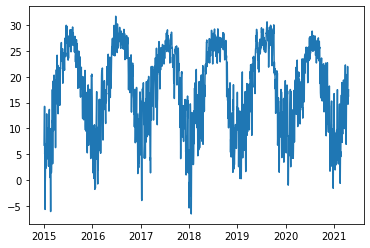

In [9]:
fig, ax = plt.subplots()
df_atl = df_temp[df_temp['name']=='Atlanta']
ax.plot(df_atl.datetime.values, df_atl.temp_mean_c.values)
len(df_atl.temp_mean_c.values), sum(df_atl.temp_mean_c.values)


### Compute the temperature at each location

In [17]:
### Make the dataframe with daily temperatures for every city (takes a while, 90K rows x 280 cities)
# For each, get the number 
df_pop = pd.read_csv('Population Data.csv')
dict_daily_temps = ed.make_list_of_dicts_of_temps(df_pop, df_temp_full)

In [18]:
daily_temps = pd.DataFrame(dict_daily_temps)

In [23]:
print(len(daily_temps))
daily_temps.head()

2302


,datetime,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York","Rochester, New York",...,"Pembroke Pines, Florida","Miramar, Florida","Hialeah, Florida","Coral Springs, Florida","Miami Gardens, Florida","Miami, Florida","Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida"
0,2015-01-01,"(2.8042193135220215, -1.06443748149932, 7.8955...","(-2.0414172014848404, -5.2967596261279555, 0.8...","(0.7271640854069779, -2.220666115556862, 3.413...","(0.721623158787829, -2.219899178588003, 3.3984...","(0.7451333314337338, -2.249080056243332, 3.489...","(0.7012627531441941, -2.2070541621717514, 3.33...","(-3.5077581597478513, -7.620209751439084, 0.50...","(-3.254167638382994, -6.70000884781188, 1.5518...","(-4.0564232869980845, -8.917841574609056, 0.59...",...,"(7.256330710739357, 1.2404408488961214, 13.303...","(7.261264629068813, 1.248439289328133, 13.3052...","(7.267839188054266, 1.2597305417711855, 13.306...","(7.201354121181819, 1.154658288185659, 13.2794...","(7.243316298738815, 1.2219635019938928, 13.294...","(7.258345407380921, 1.246744173453674, 13.2989...","(7.2134740706337235, 1.1762319103059715, 13.28...","(7.192921258888248, 1.143997576015988, 13.2713...","(7.1745562775268095, 1.1151363386505413, 13.26...","(7.093912585440351, 0.9870844318322061, 13.232..."
1,2015-01-02,"(3.5833611965500256, -1.6416043119829218, 9.48...","(1.8123476273733083, -0.4878899169065774, 4.51...","(3.6269191023738485, 1.5579536595154981, 5.636...","(3.632688786895376, 1.576935014315009, 5.63197...","(3.5967672015962546, 1.4627489512318697, 5.664...","(3.6583143659774557, 1.659695936931595, 5.6106...","(-1.6105225388897615, -6.293151018732043, 4.47...","(-1.5874865803073686, -4.9999691405260025, 4.4...","(-2.4778807262573705, -6.689108016087156, 1.21...",...,"(11.936466075098055, 8.524813888788014, 15.027...","(11.946649279284825, 8.531744135775167, 15.040...","(11.964299921129687, 8.54262383433644, 15.0643...","(11.84453325605251, 8.456272588337987, 14.9129...","(11.926497144776375, 8.513341986493058, 15.018...","(11.960202600064934, 8.53553492156532, 15.0627...","(11.88196168021216, 8.478299895369968, 14.9645...","(11.846530507310883, 8.452247756304931, 14.920...","(11.814495652370088, 8.428817579069989, 14.880...","(11.66533322685168, 8.322509004465156, 14.6904..."
2,2015-01-03,"(5.313746601456074, 0.0537208688345699, 11.180...","(-1.5042004354211351, -4.641065832081684, 3.01...","(1.9401067861655703, -0.10967571559474101, 5.0...","(1.9366071662619093, -0.09493625703022997, 5.0...","(1.9531350402008636, -0.18257317909691917, 5.0...","(1.9230983187361383, -0.031069294684709044, 5....","(-1.5629823097813513, -8.72259919416442, 5.303...","(-0.6332781996894676, -5.599949953882896, 8.30...","(0.1705551317004988, -2.7765227214309904, 2.13...",...,"(13.87299188474134, 11.604638763972225, 17.377...","(13.882819669538627, 11.613471883752727, 17.38...","(13.898439749637344, 11.627892569102757, 17.39...","(13.776804282038322, 11.520199220572357, 17.27...","(13.857516482265105, 11.59230860429814, 17.355...","(13.889114398533502, 11.620959646627288, 17.38...","(13.808623920967795, 11.549958815046766, 17.30...","(13.772007402977584, 11.517701465200151, 17.26...","(13.73905655470369, 11.488634166796466, 17.230...","(13.589111450096825, 11.35548016535289, 17.081..."
3,2015-01-04,"(6.3240501995613005, 0.6608351381009899, 11.24...","(5.867134068609182, 2.455307009739499, 10.8468...","(9.327315719399142, 5.016287003428432, 13.3491...","(9.324878087577277, 5.013497394318085, 13.3434...","(9.340760862626652, 5.022726122643198, 13.3880...","(9.313778401673078, 5.004255295419814, 13.3144...","(-1.3416096762232779, -9.124369923090002, 8.46...","(5.541667575582025, -2.200013889626242, 11.699...","(-8.105432719142934, -15.786001081793081, -1.5...",...,"(14.657100527365756, 8.184330079475108, 18.4

### Now population-weight

In [26]:
# Average per place...
def compute_daily_mean_min_max(series, pops):
    # Converts a row of (mean,min,max) per location + df_pop into a
    # population-weighted (mean,min,max)
    city_state = [s.split(', ') for s in series.index[1:]]
    weighted_mean_sum = []
    weighted_min_sum = []
    weighted_max_sum = []
    population_sum = 0
    for i,cs in enumerate(city_state):
        pop = pops[(pops.City == cs[0]) & (pops.State==cs[1])].population.values[0]
        weighted_mean_sum.append(pop*series[", ".join(cs)][0])
        weighted_min_sum.append(pop*series[", ".join(cs)][1])
        weighted_max_sum.append(pop*series[", ".join(cs)][2])

        population_sum += pop
    return sum(weighted_mean_sum)/population_sum, sum(weighted_min_sum)/population_sum, sum(weighted_max_sum)/population_sum

In [28]:
#2300 days, 280 cities per day to average over
daily_temps['daily_temps'] = daily_temps.apply(lambda row: compute_daily_mean_min_max(row, df_pop), axis=1)

In [31]:
daily_temps.head(2)

,datetime,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York","Rochester, New York",...,"Miramar, Florida","Hialeah, Florida","Coral Springs, Florida","Miami Gardens, Florida","Miami, Florida","Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida",daily_temps
0,2015-01-01,"(2.8042193135220215, -1.06443748149932, 7.8955...","(-2.0414172014848404, -5.2967596261279555, 0.8...","(0.7271640854069779, -2.220666115556862, 3.413...","(0.721623158787829, -2.219899178588003, 3.3984...","(0.7451333314337338, -2.249080056243332, 3.489...","(0.7012627531441941, -2.2070541621717514, 3.33...","(-3.5077581597478513, -7.620209751439084, 0.50...","(-3.254167638382994, -6.70000884781188, 1.5518...","(-4.0564232869980845, -8.917841574609056, 0.59...",...,"(7.261264629068813, 1.248439289328133, 13.3052...","(7.267839188054266, 1.2597305417711855, 13.306...","(7.201354121181819, 1.154658288185659, 13.2794...","(7.243316298738815, 1.2219635019938928, 13.294...","(7.258345407380921, 1.246744173453674, 13.2989...","(7.2134740706337235, 1.1762319103059715, 13.28...","(7.192921258888248, 1.143997576015988, 13.2713...","(7.1745562775268095, 1.1151363386505413, 13.26...","(7.093912585440351, 0.9870844318322061, 13.232...","(2.226442692178053, -1.988541139572663, 6.4489..."
1,2015-01-02,"(3.5833611965500256, -1.6416043119829218, 9.48...","(1.8123476273733083, -0.4878899169065774, 4.51...","(3.6269191023738485, 1.5579536595154981, 5.636...","(3.632688786895376, 1.576935014315009, 5.63197...","(3.5967672015962546, 1.4627489512318697, 5.664...","(3.6583143659774557, 1.659695936931595, 5.6106...","(-1.6105225388897615, -6.293151018732043, 4.47...","(-1.5874865803073686, -4.9999691405260025, 4.4...","(-2.4778807262573705, -6.689108016087156, 1.21...",...,"(11.946649279284825, 8.531744135775167, 15.040...","(11.964299921129687, 8.54262383433644, 15.0643...","(11.84453325605251, 8.456272588337987, 14.9129...","(11.926497144776375, 8.513341986493058, 15.018...","(11.960202600064934, 8.53553492156532, 15.0627...","(11.88196168021216, 8.478299895369968, 14.9645...","(11.846530507310883, 8.452247756304931, 14.920...","(11.814495652370088, 8.428817579069989, 14.880...","(11.66533322685168, 8.322509004465156, 14.6904...","(4.4438566903907, 0.808315671731891, 8.2566831..."


In [32]:
# Here is the final timeseries
daily_temps.to_csv('data/unused/final/daily_temps_interpolated.csv')